# Exploratory Data Analysis on Twitter Data

In [1]:
# Importing Dependencies
import numpy as np # for computing
import pandas as pd # for handling data
import seaborn as sns # for plotting heatmaps
import matplotlib.pyplot as plt # for plotting graphs
%matplotlib inline



In [2]:
# load the data
data = pd.read_csv("tweet_data.csv", encoding='latin-1')

In [3]:
# view the data
data.head()

,user_id_str,in_reply_to_screen_name,created_at,in_reply_to_status_id_str,in_reply_to_user_id_str,verified,location,geo_enabled,user_created_at,statuses_count,followers_count,favourites_count,user_lang,friends_count,country,place_type
0,2.974291e+08,NaN,Wed Dec 07 09:49:46 +0000 2016,NaN,NaN,False,"New Jersey, USA",True,Thu May 12 14:09:09 +0000 2011,3072,244,5,en,160,United States,city
1,4.390121e+07,DinaPugliese,Wed Dec 07 09:49:49 +0000 2016,8.060000e+17,1.479665e+08,False,Cochrane,True,Mon Jun 01 15:16:28 +0000 2009,7548,298,3768,en,296,Canada,city
2,2.436496e+09,NaN,Wed Dec 07 09:49:49 +0000 2016,NaN,NaN,False,NaN,True,Tue Mar 25 20:50:17 +0000 2014,5862,178,1067,en,229,United States,city
3,2.555416e+09,monieke71,Wed Dec 07 09:49:51 +0000 2016,8.060000e+17,3.221206e+09,False,France,True,Sun Jun 08 19:54:41 +0000 2014,123574,1058,58074,fr,559,France,city
4,7.780000e+17,NaN,Wed Dec 07 09:50:00 +0000 2016,NaN,NaN,False,"4 Ubiaja Crescent, Garki ll, Abuja. 08079699171.",True,Sun Sep 18 17:15:34 +0000 2016,53,56,0,en,366,Nigeria,admin


In [4]:
# shape of the data in order to view the number of features and datapoints
data.shape

(4811, 16)

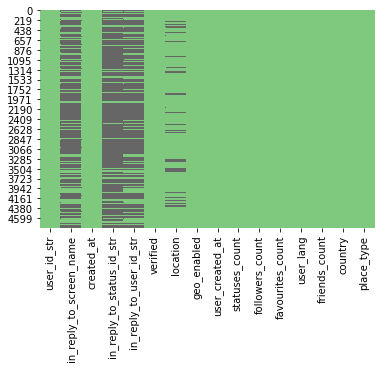

In [5]:
# visualize if the data has any missing values
sns.heatmap(data.isnull(), cbar=False, cmap='Accent')

Apparently, the data has quite alot of missing values which we have to deal with.
 Some of these values are actually missing and some of them are just values that don't exist and this can be helpful in our EDA.

In [6]:
# let's see the columns with missing values and actually the number of missing values in each of the columns.
data.isnull().sum()

user_id_str                     0
in_reply_to_screen_name      3523
created_at                      0
in_reply_to_status_id_str    4151
in_reply_to_user_id_str      3523
verified                        0
location                      635
geo_enabled                     0
user_created_at                 0
statuses_count                  0
followers_count                 0
favourites_count                0
user_lang                       0
friends_count                   0
country                         0
place_type                      0
dtype: int64

Another consideration to make is that all of the columns are actually fine having the missing values.
     Moving on.

In [7]:
# fill the missing values with a value that we can easily identify with while performing EDA
data['location'] = data['location'].replace(np.nan, 0, regex=True)





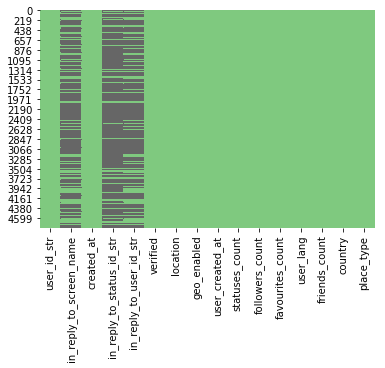

In [8]:
# Visualize once more in order to see if the data has been filled
sns.heatmap(data.isnull(), cbar=False, cmap='Accent')


Note that all the missing values have been filled. Now '0' in location column represents tweet not geotagged.
 The columns with missing values are:
         1.in_reply_to_screen_name      
         2.in_reply_to_status_id_str    
         3.in_reply_to_user_id_str      
         4.location                     

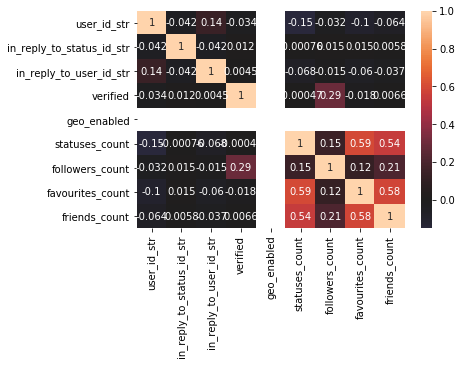

In [9]:
# perform some correlation on the data to identify the relationships that exist among the features.
corr = data.corr()
sns.heatmap(corr, center=0, annot=True)

The correlation of our data is okay since dropping of some columns was done in Excel.

In [10]:
# view the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4811 entries, 0 to 4810
Data columns (total 16 columns):
user_id_str                  4811 non-null float64
in_reply_to_screen_name      1288 non-null object
created_at                   4811 non-null object
in_reply_to_status_id_str    660 non-null float64
in_reply_to_user_id_str      1288 non-null float64
verified                     4811 non-null bool
location                     4811 non-null object
geo_enabled                  4811 non-null bool
user_created_at              4811 non-null object
statuses_count               4811 non-null int64
followers_count              4811 non-null int64
favourites_count             4811 non-null int64
user_lang                    4811 non-null object
friends_count                4811 non-null int64
country                      4811 non-null object
place_type                   4811 non-null object
dtypes: bool(2), float64(3), int64(4), object(7)
memory usage: 535.7+ KB


The data has different datatypes which still work preperly when performing EDA.

# Exploratory Data Analysis

In [11]:
# separate the number of people who did not geotag in their own dataframe
data_not_tag = data[data['location']==0]

In [12]:
data_not_tag.shape


(635, 16)

635 people did not geotag their tweets. Why??

In [13]:
data_tag = data[data['location'] !=0]

In [14]:
data_tag.shape

(4176, 16)

out of 4,811 tweets, 4,176 were geotagged.

In [15]:
# compare the features of the people who tagged their location and those who didn't.
# start by describing the 2 datasets
print("Data description for people who geotagged their tweets")
data_tag.describe()


Data description for people who geotagged their tweets


,user_id_str,in_reply_to_status_id_str,in_reply_to_user_id_str,statuses_count,followers_count,favourites_count,friends_count
count,4.176000e+03,5.390000e+02,1.110000e+03,4176.000000,4.176000e+03,4176.000000,4176.000000
mean,5.847246e+16,8.061651e+17,7.228649e+16,55513.899665,4.072214e+03,13189.494013,1363.183908
std,2.025241e+17,3.340165e+15,2.227934e+17,87902.490925,3.992252e+04,29672.365420,4286.096237
min,1.081000e+03,7.430000e+17,5.520952e+06,1.000000,0.000000e+00,0.000000,0.000000
25%,1.774324e+08,8.060000e+17,8.928280e+07,4197.500000,2.040000e+02,252.750000,186.000000
50%,5.555985e+08,8.060000e+17,5.253445e+08,15542.500000,6.280000e+02,2405.000000,488.500000
75%,2.895411e+09,8.070000e+17,2.711855e+09,59551.000000,1.698250e+03,10808.250000,1254.000000
max,8.070000e+17,8.070000e+17,8.070000e+17,423826.000000,1.990930e+06,412345.000000,127633.000000


In [16]:
# not tagged tweets
print("Data Description for people who did not geotag their tweets")
data_not_tag.describe()

Data Description for people who did not geotag their tweets


,user_id_str,in_reply_to_status_id_str,in_reply_to_user_id_str,statuses_count,followers_count,favourites_count,friends_count
count,6.350000e+02,1.210000e+02,1.780000e+02,635.000000,635.000000,635.000000,635.000000
mean,1.002913e+17,8.051901e+17,9.120787e+16,78906.250394,5645.737008,27418.486614,5563.176378
std,2.573196e+17,8.299914e+15,2.502563e+17,195205.213649,15202.307980,65959.036376,15840.986315
min,1.261243e+07,7.180000e+17,1.574188e+07,1.000000,0.000000,0.000000,0.000000
25%,4.620675e+08,8.060000e+17,2.704799e+08,1774.000000,135.000000,339.500000,152.000000
50%,2.365617e+09,8.060000e+17,1.183857e+09,9194.000000,422.000000,2292.000000,390.000000
75%,3.248205e+09,8.070000e+17,2.940280e+09,31156.000000,1266.000000,11457.000000,951.000000
max,8.070000e+17,8.070000e+17,8.060000e+17,708799.000000,71909.000000,237707.000000,56876.000000


According to the mean count of followers for 25% of the population, people who tag their tweets have more followers than people who do not tag their tweets.

Top 10 countries from which people geotagged their tweets


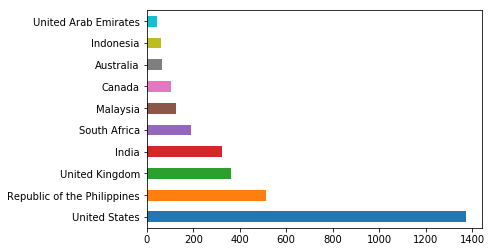

In [17]:
# top 10 countries from which people geotagged their tweets.
top_country = data_tag.country.value_counts()[:10]
top_country.plot(kind='barh')
print("Top 10 countries from which people geotagged their tweets")
plt.show()


Top 10 countries from which people did not geotagged their tweets


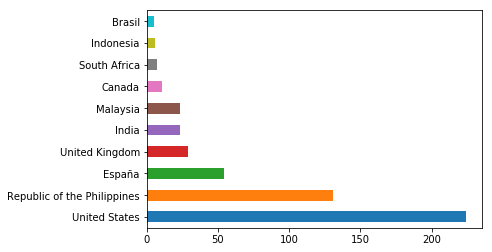

In [18]:
top_country2 = data_not_tag.country.value_counts()[:10]
top_country2.plot(kind='barh')
print("Top 10 countries from which people did not geotagged their tweets")
plt.show()


More people from United States geotagged their tweets than people who did not.Why? Maybe most twitter users have phones with better GPS than people with not. Maybe streets in the US have better scenery that entice people to geotag. More feature engineering can be performed on the data to get much precise conclusions. The different countries from the dataset have different counts for geotagging.

Place geotagged from


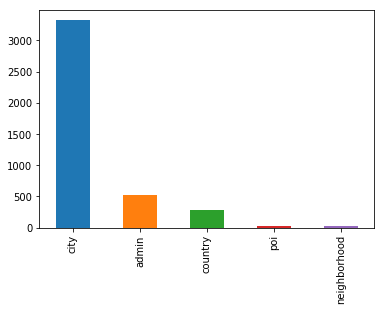

In [19]:
place = data_tag.place_type.value_counts()
place.plot(kind='bar')
print("Place geotagged from")
plt.show()

Place from


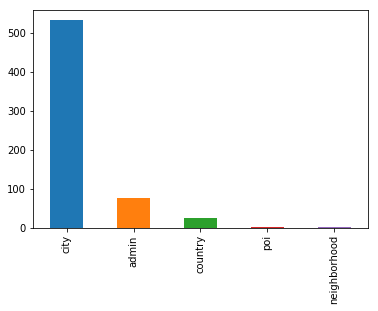

In [20]:
place = data_not_tag.place_type.value_counts()
place.plot(kind='bar')
print("Place from")
plt.show()

Majority of people who geotagged are from the city and so is those who did not.But at a closer look, most people from the city geotagged.

In [21]:
# create a column for the year that the user joined twitter.
# splitting the date account created to the year.
data_tag['user_created_at'] = pd.to_datetime(data_tag['user_created_at'])
data_tag['year'] = data_tag['user_created_at'].dt.strftime('%y')
data_tag['year'].head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0    11
1    09
3    14
4    16
5    09
Name: year, dtype: object

The year when the people who geotagged joined twitter


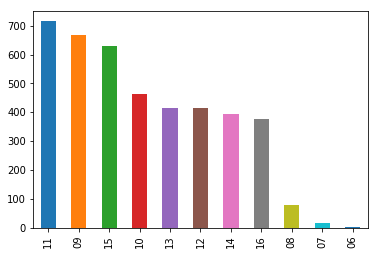

In [22]:
year = data_tag.year.value_counts()
year.plot(kind='bar')
print("The year when the people who geotagged joined twitter")
plt.show()


Year joined for people who did not geotag their tweets


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


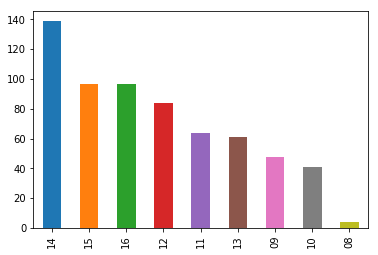

In [23]:
# convert the column to a datetime format
data_not_tag['user_created_at'] = pd.to_datetime(data_not_tag['user_created_at'])
data_not_tag['year'] = data_not_tag['user_created_at'].dt.strftime('%y')

# plotting the year the people who did not geotag joined twitter
year = data_not_tag.year.value_counts()
year.plot(kind='bar')
print("Year joined for people who did not geotag their tweets")
plt.show()

Language of geotagged tweets against the count of tweets


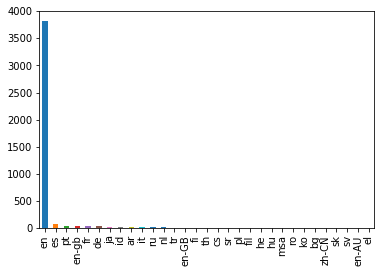

In [24]:
# plotting the language the tweeter users who geotagged understands.
lang = data_tag.user_lang.value_counts()
lang.plot(kind='bar')
print("Language of geotagged tweets against the count of tweets")
plt.show()

Language of tweets not geotagged against the count of tweets


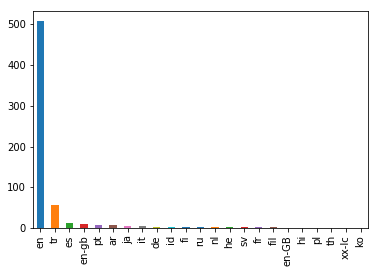

In [25]:
lang = data_not_tag.user_lang.value_counts()
lang.plot(kind='bar')
print("Language of tweets not geotagged against the count of tweets")
plt.show()

In [26]:
# Calculating the mean of the friends_count
print("Mean number of friends for the people who geotagged their tweets is:")
data_tag.friends_count.mean()


Mean number of friends for the people who geotagged their tweets is:


1363.183908045977

In [27]:
print("Mean number of friends for the people who did not geotag their tweets is:")
data_not_tag.friends_count.mean()


Mean number of friends for the people who did not geotag their tweets is:


5563.1763779527555

People who do not geotag their tweets have more friends than people who geotag their tweets.